# Unmasking-Real-and-Fraudulent-Job-Classifier-Model-by-Machine-Learning-and-NLP

In [171]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_theme(style="whitegrid")

In [172]:
fake_job_postings = pd.read_csv("D:\\data_sets\\fake_job_postings.csv")
fake_job_postings.head()

job_id                                      title            location  \
0       1                           Marketing Intern    US, NY, New York   
1       2  Customer Service - Cloud Video Production      NZ, , Auckland   
2       3    Commissioning Machinery Assistant (CMA)       US, IA, Wever   
3       4          Account Executive - Washington DC  US, DC, Washington   
4       5                        Bill Review Manager  US, FL, Fort Worth   

  department salary_range                                    company_profile  \
0  Marketing          NaN  We're Food52, and we've created a groundbreaki...   
1    Success          NaN  90 Seconds, the worlds Cloud Video Production ...   
2        NaN          NaN  Valor Services provides Workforce Solutions th...   
3      Sales          NaN  Our passion for improving quality of life thro...   
4        NaN          NaN  SpotSource Solutions LLC is a Global Human Cap...   

                                         description  \
0  Food52, a fast-growing, James Beard Award-winn...   
1  Organised - Focused - Vibrant - Awesome!Do you...   
2  Our client, located in Houston, is actively se...   
3  THE COMPANY: ESRI – Environmental Systems Rese...   
4  JOB TITLE: Itemization Review ManagerLOCATION:...   

                                        requirements  \
0  Experience with content management systems a m...   
1  What we expect from you:Your key responsibilit...   
2  Implement pre-commissioning and commissioning ...   
3  EDUCATION: Bachelor’s or Master’s in GIS, busi...   
4  QUALIFICATIONS:RN license in the State of Texa...   

                                            benefits  telecommuting  \
0                                                NaN              0   
1  What you will get from usThrough being part of...              0   
2                                                NaN              0   
3  Our culture is anything but corporate—we have ...              0   
4                              Full Benefits Offered              0   

   has_company_logo  has_questions employment_type required_experience  \
0                 1              0           Other          Internship   
1                 1              0       Full-time      Not Applicable   
2                 1              0             NaN                 NaN   
3                 1              0       Full-time    Mid-Senior level   
4                 1              1       Full-time    Mid-Senior level   

  required_education                   industry              function  \
0                NaN                        NaN             Marketing   
1                NaN  Marketing and Advertising      Customer Service   
2                NaN                        NaN                   NaN   
3  Bachelor's Degree          Computer Software                 Sales   
4  Bachelor's Degree     Hospital & Health Care  Health Care Provider   

   fraudulent  
0           0  
1           0  
2           0  
3           0  
4           0

In [173]:
fake_job_postings.location = fake_job_postings.location.fillna('blank')

In [174]:
splitted = fake_job_postings['location'].str.split(',', n=2, expand=True)

fake_job_postings['country'] = splitted[0]
fake_job_postings['state'] = splitted[1]
fake_job_postings['city'] = splitted[2]

fake_job_postings.head()

job_id                                      title            location  \
0       1                           Marketing Intern    US, NY, New York   
1       2  Customer Service - Cloud Video Production      NZ, , Auckland   
2       3    Commissioning Machinery Assistant (CMA)       US, IA, Wever   
3       4          Account Executive - Washington DC  US, DC, Washington   
4       5                        Bill Review Manager  US, FL, Fort Worth   

  department salary_range                                    company_profile  \
0  Marketing          NaN  We're Food52, and we've created a groundbreaki...   
1    Success          NaN  90 Seconds, the worlds Cloud Video Production ...   
2        NaN          NaN  Valor Services provides Workforce Solutions th...   
3      Sales          NaN  Our passion for improving quality of life thro...   
4        NaN          NaN  SpotSource Solutions LLC is a Global Human Cap...   

                                         description  \
0  Food52, a fast-growing, James Beard Award-winn...   
1  Organised - Focused - Vibrant - Awesome!Do you...   
2  Our client, located in Houston, is actively se...   
3  THE COMPANY: ESRI – Environmental Systems Rese...   
4  JOB TITLE: Itemization Review ManagerLOCATION:...   

                                        requirements  \
0  Experience with content management systems a m...   
1  What we expect from you:Your key responsibilit...   
2  Implement pre-commissioning and commissioning ...   
3  EDUCATION: Bachelor’s or Master’s in GIS, busi...   
4  QUALIFICATIONS:RN license in the State of Texa...   

                                            benefits  telecommuting  ...  \
0                                                NaN              0  ...   
1  What you will get from usThrough being part of...              0  ...   
2                                                NaN              0  ...   
3  Our culture is anything but corporate—we have ...              0  ...   
4                              Full Benefits Offered              0  ...   

   has_questions  employment_type required_experience required_education  \
0              0            Other          Internship                NaN   
1              0        Full-time      Not Applicable                NaN   
2              0              NaN                 NaN                NaN   
3              0        Full-time    Mid-Senior level  Bachelor's Degree   
4              1        Full-time    Mid-Senior level  Bachelor's Degree   

                    industry              function fraudulent  country state  \
0                        NaN             Marketing          0       US    NY   
1  Marketing and Advertising      Customer Service          0       NZ         
2                        NaN                   NaN          0       US    IA   
3          Computer Software                 Sales          0       US    DC   
4     Hospital & Health Care  Health Care Provider          0       US    FL   

          city  
0     New York  
1     Auckland  
2        Wever  
3   Washington  
4   Fort Worth  

[5 rows x 21 columns]

In [175]:
fake_job_postings.isna().sum()

job_id                     0
title                      0
location                   0
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
country                    0
state                    440
city                     440
dtype: int64

In [176]:
fake_job_postings.city = fake_job_postings.city.fillna('blank')
fake_job_postings.state = fake_job_postings.state.fillna('blank')
fake_job_postings.employment_type = fake_job_postings.employment_type.fillna('blank')
fake_job_postings.required_experience = fake_job_postings.required_experience.fillna('blank')
fake_job_postings.required_education = fake_job_postings.required_education.fillna('blank')
fake_job_postings.industry = fake_job_postings.industry.fillna('blank')
fake_job_postings.function = fake_job_postings.function.fillna('blank')

In [177]:
fake_job_postings.isna().sum()

job_id                     0
title                      0
location                   0
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type            0
required_experience        0
required_education         0
industry                   0
function                   0
fraudulent                 0
country                    0
state                      0
city                       0
dtype: int64

In [178]:
fake_job_postings = fake_job_postings.reset_index()

In [179]:
fake_job_postings = fake_job_postings[fake_job_postings['city'].notna()]
fake_job_postings = fake_job_postings[fake_job_postings['state'].notna()]

In [180]:
fake_job_postings.shape

(17880, 22)

In [181]:
fake_job_postings['state_city'] = fake_job_postings['state'] + ", " + fake_job_postings['city']

In [182]:
fake_job_postings.isna().sum()

index                      0
job_id                     0
title                      0
location                   0
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type            0
required_experience        0
required_education         0
industry                   0
function                   0
fraudulent                 0
country                    0
state                      0
city                       0
state_city                 0
dtype: int64

In [183]:
fake_job_postings.city = fake_job_postings.city.str.strip()
fake_job_postings.state = fake_job_postings.state.str.strip()

In [184]:
fake_job_postings

index  job_id                                              title  \
0          0       1                                   Marketing Intern   
1          1       2          Customer Service - Cloud Video Production   
2          2       3            Commissioning Machinery Assistant (CMA)   
3          3       4                  Account Executive - Washington DC   
4          4       5                                Bill Review Manager   
...      ...     ...                                                ...   
17875  17875   17876                   Account Director - Distribution    
17876  17876   17877                                 Payroll Accountant   
17877  17877   17878  Project Cost Control Staff Engineer - Cost Con...   
17878  17878   17879                                   Graphic Designer   
17879  17879   17880                         Web Application Developers   

                   location   department salary_range  \
0          US, NY, New York    Marketing          NaN   
1            NZ, , Auckland      Success          NaN   
2             US, IA, Wever          NaN          NaN   
3        US, DC, Washington        Sales          NaN   
4        US, FL, Fort Worth          NaN          NaN   
...                     ...          ...          ...   
17875       CA, ON, Toronto        Sales          NaN   
17876  US, PA, Philadelphia   Accounting          NaN   
17877       US, TX, Houston          NaN          NaN   
17878         NG, LA, Lagos          NaN          NaN   
17879     NZ, N, Wellington  Engineering          NaN   

                                         company_profile  \
0      We're Food52, and we've created a groundbreaki...   
1      90 Seconds, the worlds Cloud Video Production ...   
2      Valor Services provides Workforce Solutions th...   
3      Our passion for improving quality of life thro...   
4      SpotSource Solutions LLC is a Global Human Cap...   
...                                                  ...   
17875  Vend is looking for some awesome new talent to...   
17876  WebLinc is the e-commerce platform and service...   
17877  We Provide Full Time Permanent Positions for m...   
17878                                                NaN   
17879  Vend is looking for some awesome new talent to...   

                                             description  \
0      Food52, a fast-growing, James Beard Award-winn...   
1      Organised - Focused - Vibrant - Awesome!Do you...   
2      Our client, located in Houston, is actively se...   
3      THE COMPANY: ESRI – Environmental Systems Rese...   
4      JOB TITLE: Itemization Review ManagerLOCATION:...   
...                                                  ...   
17875  Just in case this is the first time you’ve vis...   
17876  The Payroll Accountant will focus primarily on...   
17877  Experienced Project Cost Control Staff Enginee...   
17878  Nemsia Studios is looking for an experienced v...   
17879  Who are we?Vend is an award winning web based ...   

                                            requirements  \
0      Experience with content management systems a m...   
1      What we expect from you:Your key responsibilit...   
2      Implement pre-commissioning and commissioning ...   
3      EDUCATION: Bachelor’s or Master’s in GIS, busi...   
4      QUALIFICATIONS:RN license in the State of Texa...   
...                                                  ...   
17875  To ace this role you:Will eat comprehensive St...   
17876  - B.A. or B.S. in Accounting- Desire to have f...   
17877  At least 12 years professional experience.Abil...   
17878  1. Must be fluent in the latest versions of Co...   
17879  We want to hear from you if:You have an in-dep...   

                                                benefits  ...  \
0                                                    NaN  ...   
1      What you will get from usThrough being part of...  ...   
2                                                    NaN  ...  

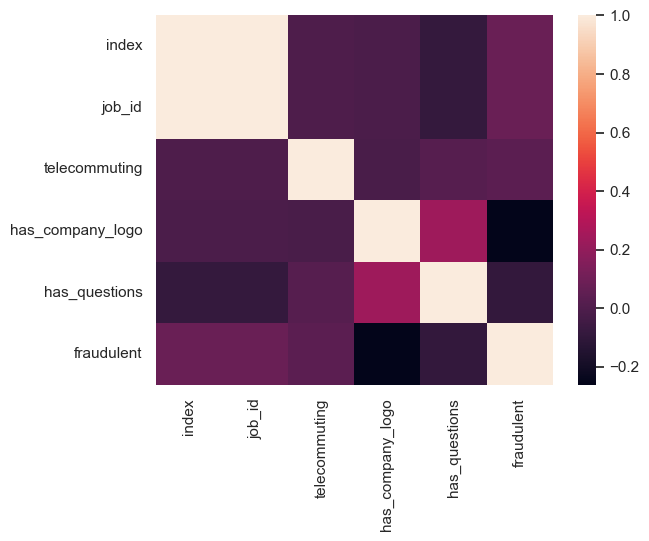

In [185]:
corr = fake_job_postings.corr()
sns.heatmap(corr)
plt.show()

# Repeat these line for GB,GR,CA and DE. Replace every US with each of them

## For US

In [186]:
fake_job_postings_US = fake_job_postings[fake_job_postings['country'].str.contains("US")]

In [187]:
len(fake_job_postings_US[fake_job_postings_US.fraudulent == 0]), len(fake_job_postings_US[fake_job_postings_US.fraudulent == 1]), 

(9926, 730)

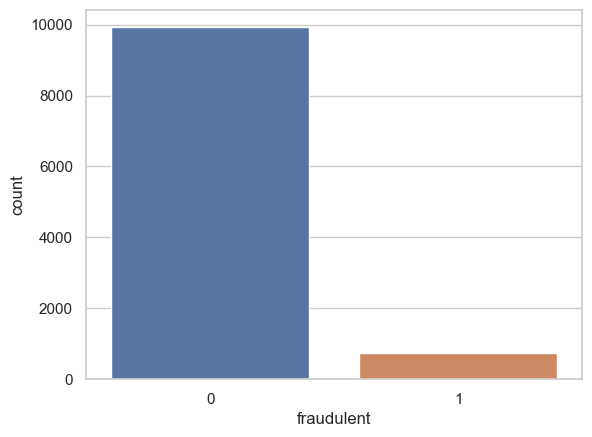

In [188]:
sns.countplot(x='fraudulent', data=fake_job_postings_US);

In [189]:
def sns_countplot(feature):
    sns.countplot(x=feature, data=fake_job_postings_US, hue="fraudulent",
              order=fake_job_postings_US[feature].value_counts().iloc[:10].index)
    plt.xticks(rotation=90)
    title = feature + ' fake job count'
    plt.title('Location Fake Jobs')
    plt.show()

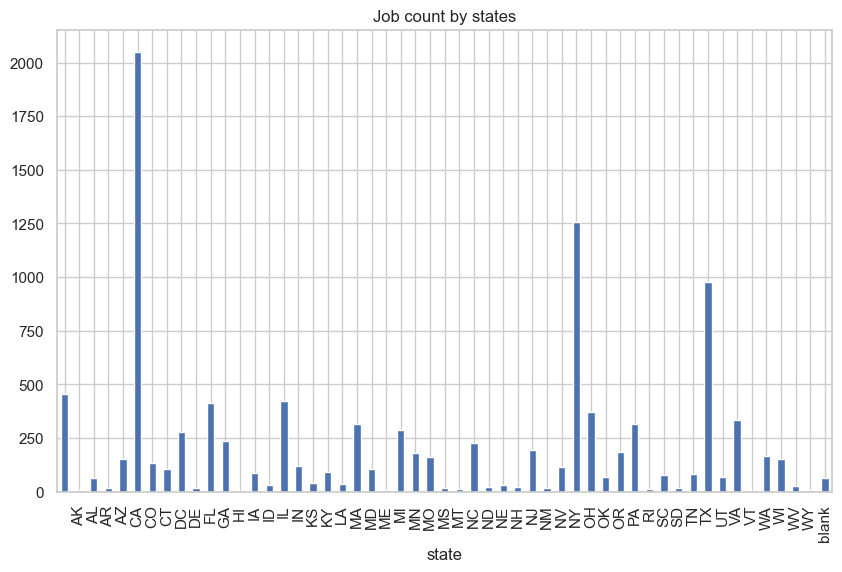

In [190]:
plt.figure(figsize=(10,6))
fake_job_postings_US.groupby('state').fraudulent.count().plot(kind='bar', title='Job count by states');

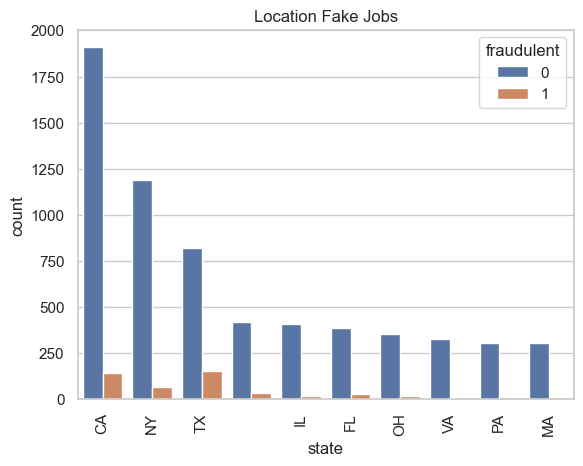

In [191]:
sns_countplot("state")

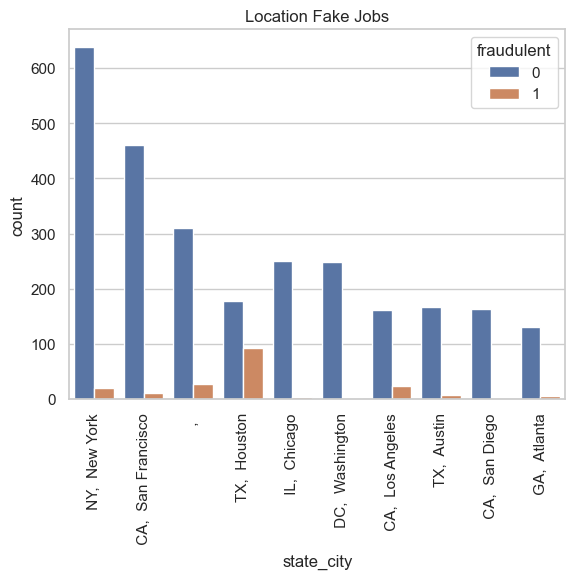

In [192]:
sns_countplot("state_city")

## For GB 

In [193]:
fake_job_postings_GB = fake_job_postings[fake_job_postings['country'].str.contains("GB")]

In [194]:
len(fake_job_postings_GB[fake_job_postings_GB.fraudulent == 0]), len(fake_job_postings_GB[fake_job_postings_GB.fraudulent == 1]),

(2361, 23)

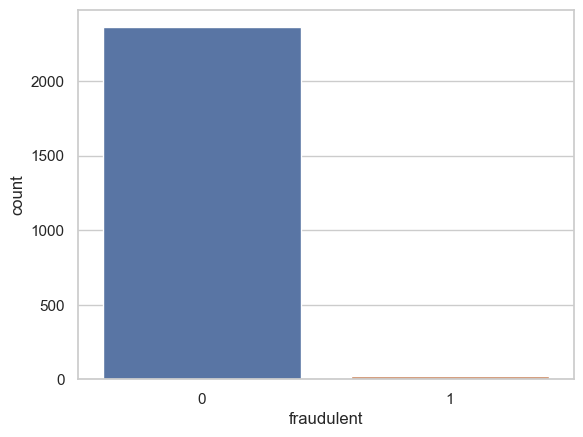

In [195]:
sns.countplot(x='fraudulent', data=fake_job_postings_GB);

In [196]:
def sns_countplot(feature):
    sns.countplot(x=feature, data=fake_job_postings_GB, hue="fraudulent",
              order=fake_job_postings_GB[feature].value_counts().iloc[:10].index)
    plt.xticks(rotation=90)
    title = feature + ' fake job count'
    plt.title('Location Fake Jobs')
    plt.show()

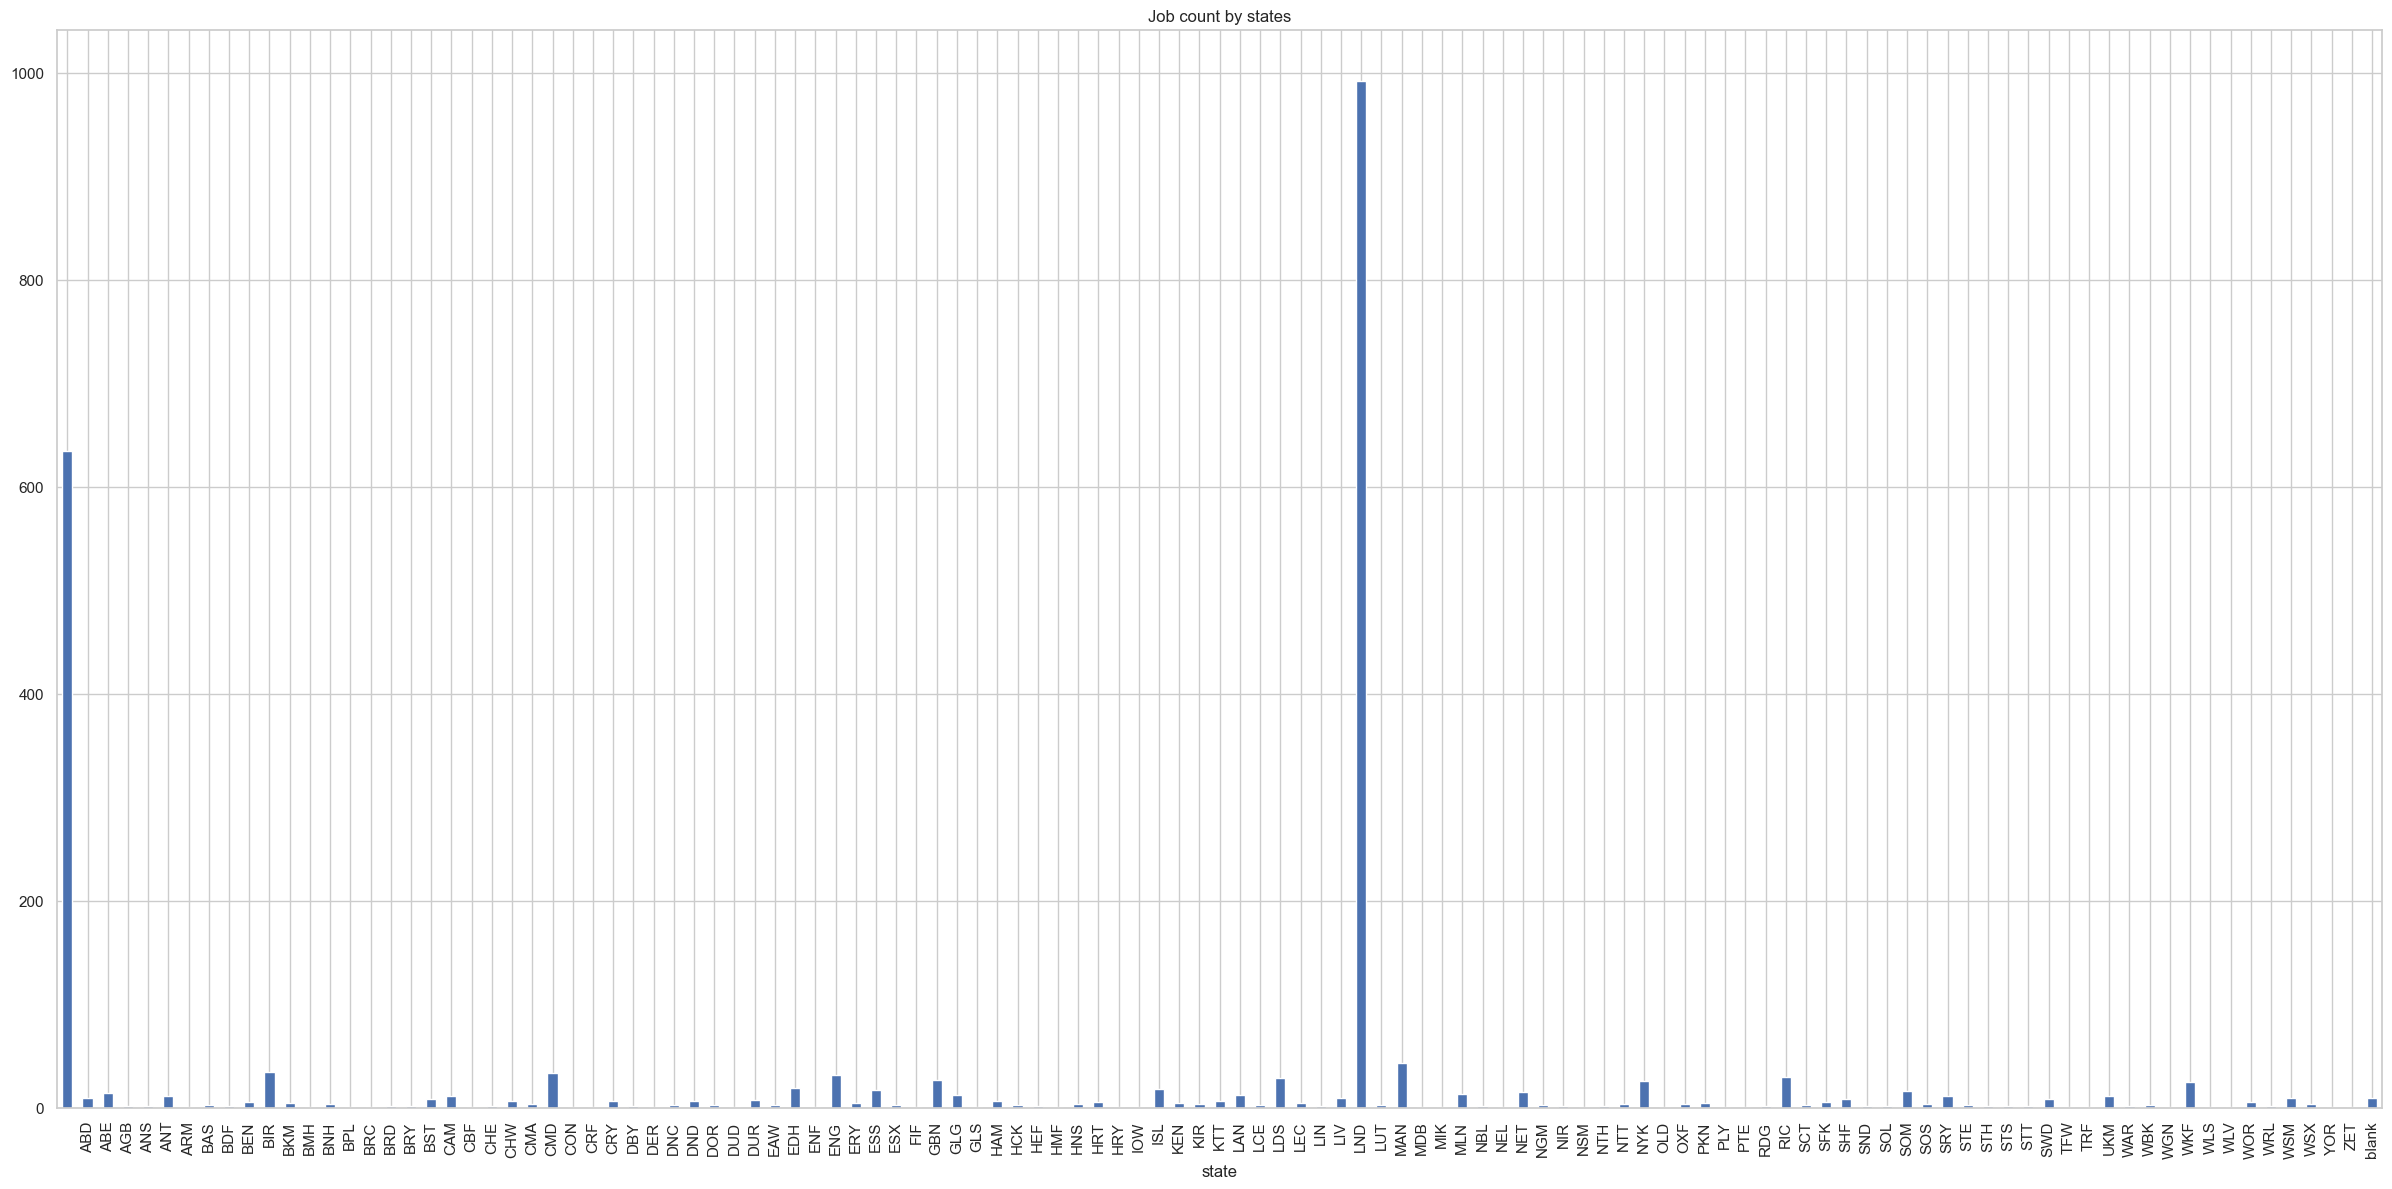

In [197]:
plt.figure(figsize=(30,14))
fake_job_postings_GB.groupby('state').fraudulent.count().plot(kind='bar', title='Job count by states');

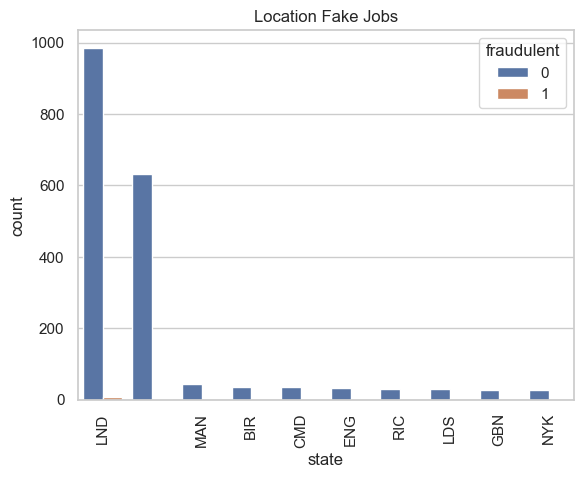

In [198]:
sns_countplot("state")

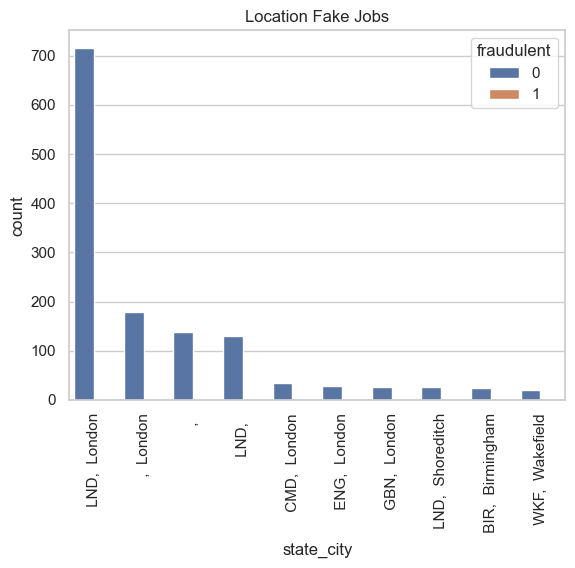

In [199]:
sns_countplot("state_city")

## For GR 

In [200]:
fake_job_postings_GR = fake_job_postings[fake_job_postings['country'].str.contains("GR")]

In [201]:
len(fake_job_postings_GR[fake_job_postings_GR.fraudulent == 0]), len(fake_job_postings_GR[fake_job_postings_GR.fraudulent == 1]),

(940, 0)

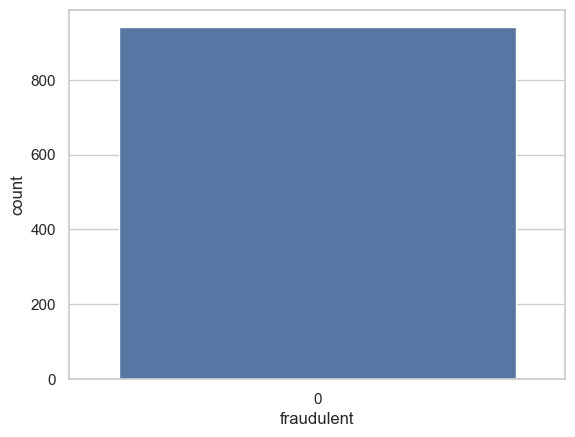

In [202]:
sns.countplot(x='fraudulent', data=fake_job_postings_GR);

In [203]:
def sns_countplot(feature):
    sns.countplot(x=feature, data=fake_job_postings_GR, hue="fraudulent",
              order=fake_job_postings_GR[feature].value_counts().iloc[:10].index)
    plt.xticks(rotation=90)
    title = feature + ' fake job count'
    plt.title('Location Fake Jobs')
    plt.show()

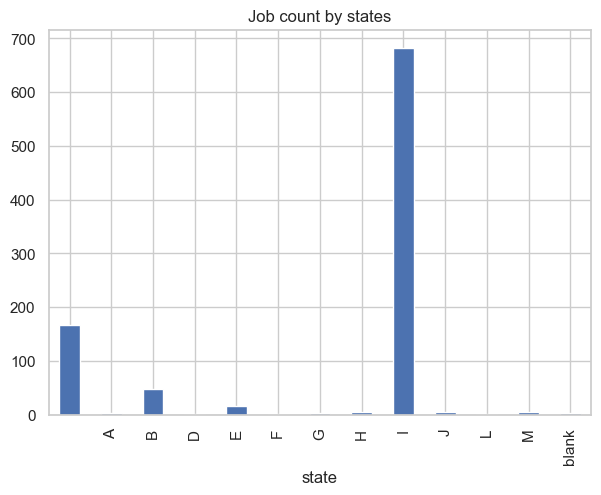

In [204]:
plt.figure(figsize=(7,5))
fake_job_postings_GR.groupby('state').fraudulent.count().plot(kind='bar', title='Job count by states');

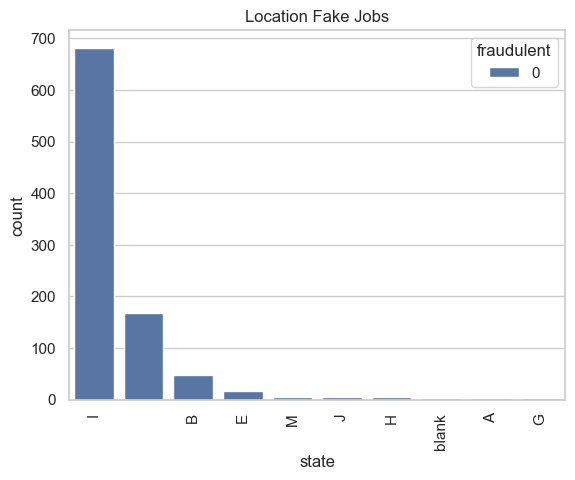

In [205]:
sns_countplot("state")

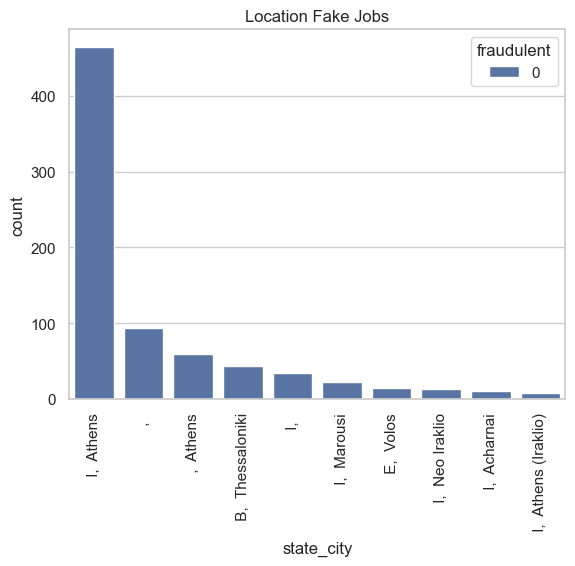

In [206]:
sns_countplot("state_city")

## For CA 

In [207]:
fake_job_postings_CA= fake_job_postings[fake_job_postings['country'].str.contains("CA")]

In [208]:
len(fake_job_postings_CA[fake_job_postings_CA.fraudulent == 0]), len(fake_job_postings_CA[fake_job_postings_CA.fraudulent == 1]),

(445, 12)

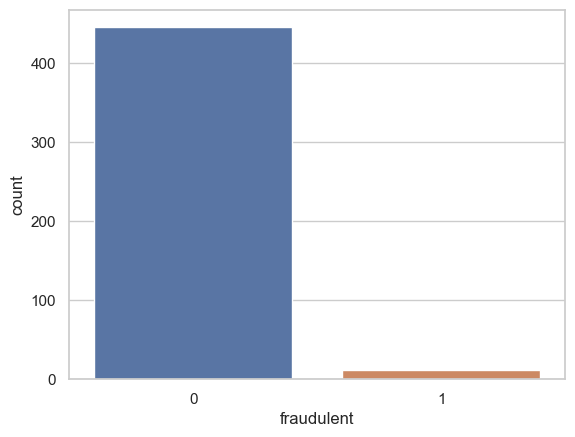

In [209]:
sns.countplot(x='fraudulent', data=fake_job_postings_CA);

In [210]:
def sns_countplot(feature):
    sns.countplot(x=feature, data=fake_job_postings_CA, hue="fraudulent",
              order=fake_job_postings_CA[feature].value_counts().iloc[:10].index)
    plt.xticks(rotation=90)
    title = feature + ' fake job count'
    plt.title('Location Fake Jobs')
    plt.show()

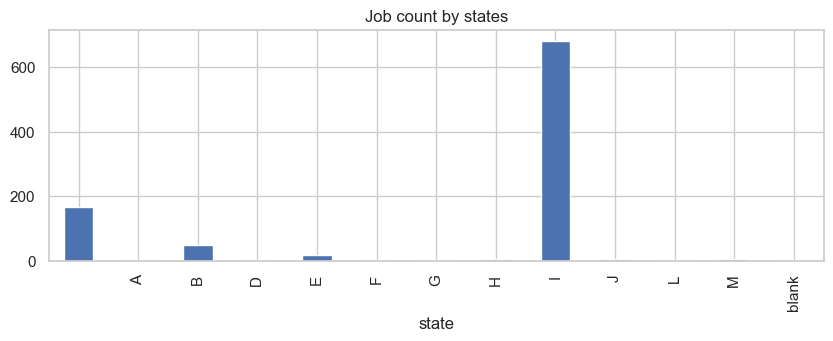

In [211]:
plt.figure(figsize=(10,3))
fake_job_postings_GR.groupby('state').fraudulent.count().plot(kind='bar', title='Job count by states');

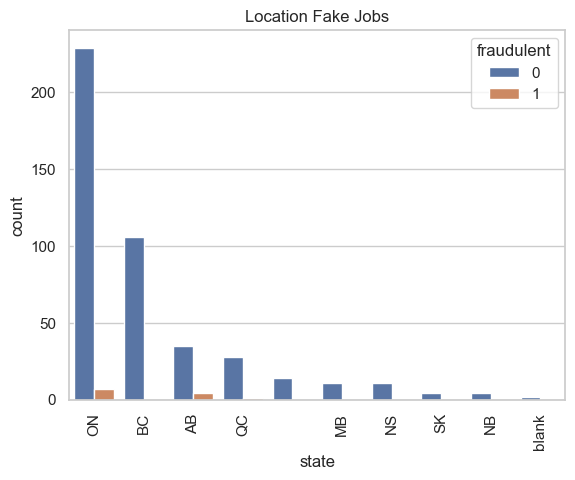

In [212]:
sns_countplot("state")

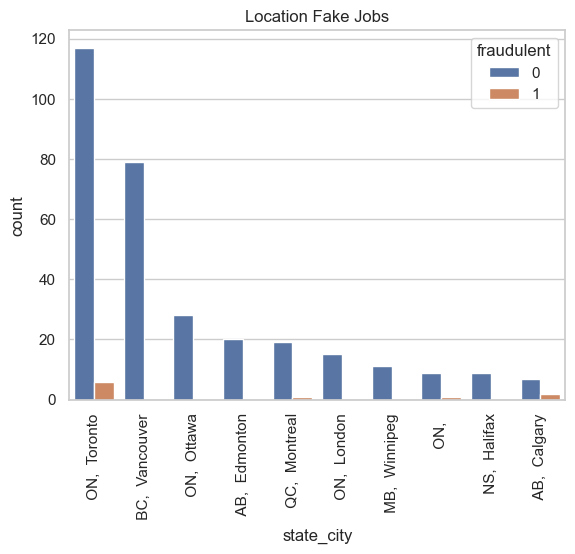

In [213]:
sns_countplot("state_city")

## For DE

In [214]:
fake_job_postings_DE = fake_job_postings[fake_job_postings['country'].str.contains("DE")]

In [215]:
len(fake_job_postings_DE[fake_job_postings_DE.fraudulent == 0]), len(fake_job_postings_DE[fake_job_postings_DE.fraudulent == 1]),

(383, 0)

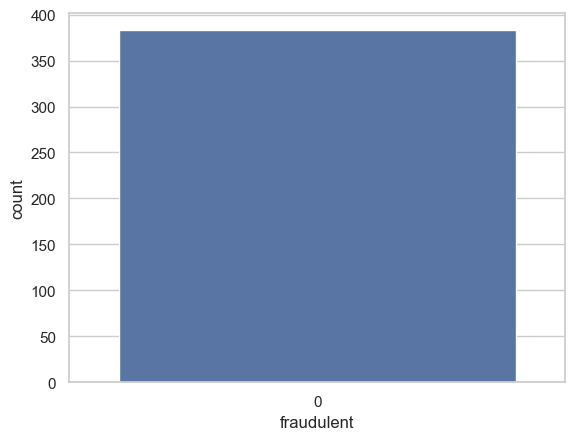

In [216]:
sns.countplot(x='fraudulent', data=fake_job_postings_DE);

In [217]:
def sns_countplot(feature):
    sns.countplot(x=feature, data=fake_job_postings_DE, hue="fraudulent",
              order=fake_job_postings_DE[feature].value_counts().iloc[:10].index)
    plt.xticks(rotation=90)
    title = feature + ' fake job count'
    plt.title('Location Fake Jobs')
    plt.show()

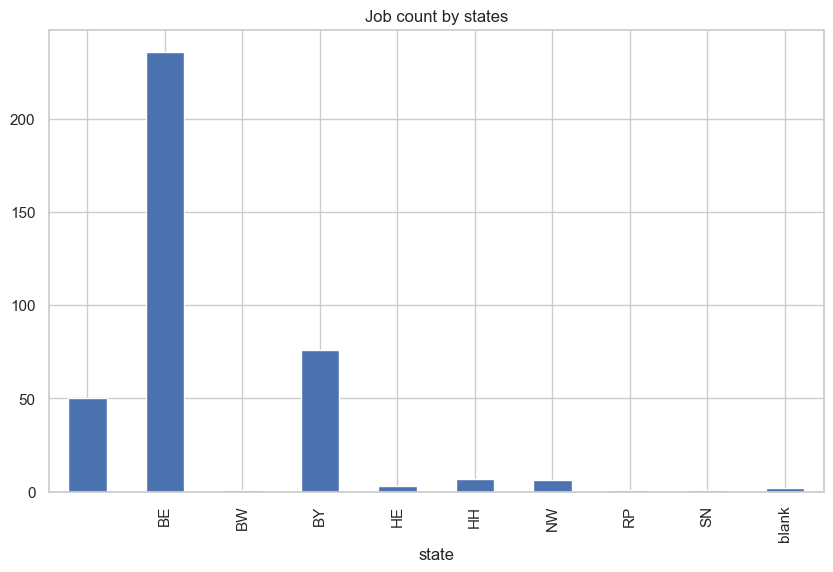

In [218]:
plt.figure(figsize=(10,6))
fake_job_postings_DE.groupby('state').fraudulent.count().plot(kind='bar', title='Job count by states');

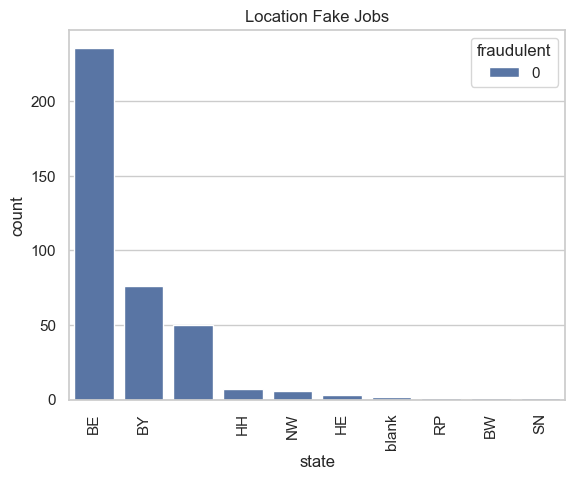

In [219]:
sns_countplot("state")

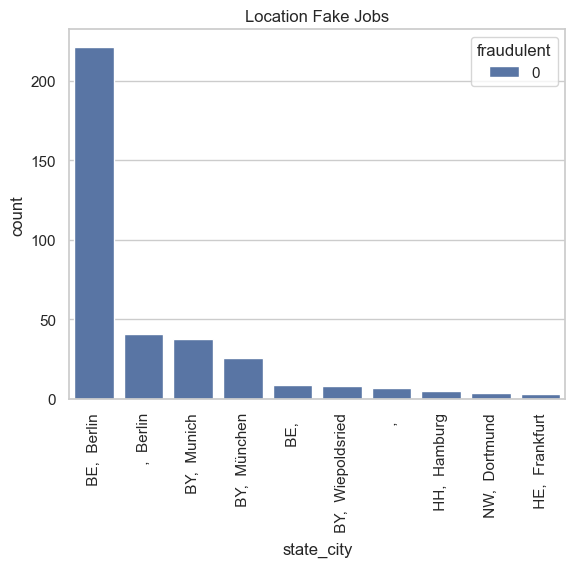

In [220]:
sns_countplot("state_city")

# Repeate these lines for required_experience, required_education, industry and function in the place of location

In [68]:
location_ratio = round(fake_job_postings[fake_job_postings.fraudulent == 1].groupby('state_city').state_city.count()/fake_job_postings[fake_job_postings.fraudulent == 0].groupby('state_city').state_city.count(), 2)
location_ratio = pd.DataFrame({'state_city':location_ratio.index, 'ratio':location_ratio.values})

In [69]:
location_ratio

state_city  ratio
0                                                ,     0.05
1                                     ,   Mclean VA.    NaN
2                                          ,  ATHENS    NaN
3                                          ,  AUSTIN    NaN
4                                        ,  Aberdeen    NaN
...                                              ...    ...
2994                                  ZH,  Rotterdam    NaN
2995   ZH,  Rotterdam, The Hague, Utrecht, Amsterdam    NaN
2996                                     ZH,  Zurich    NaN
2997                                     ZH,  Zürich    NaN
2998                                    blank, blank   0.07

[2999 rows x 2 columns]

In [70]:
fake_job_postings = fake_job_postings.merge(location_ratio)

In [71]:
fake_job_postings.ratio.fillna(0, inplace=True)

In [72]:
location_ratio_plot = location_ratio[location_ratio.ratio >= 1]

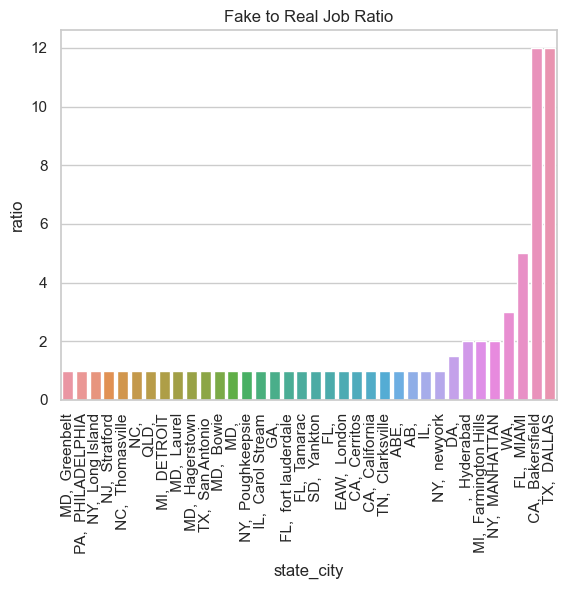

In [73]:
sns.barplot(data=location_ratio_plot.sort_values(by='ratio'), x='state_city', y='ratio')
plt.xticks(rotation=90)
plt.title('Fake to Real Job Ratio')
plt.show()

# 1. Employment_type

In [74]:
emp_ratio = round(fake_job_postings[fake_job_postings.fraudulent == 1].groupby('employment_type').employment_type.count()/fake_job_postings[fake_job_postings.fraudulent == 0].groupby('employment_type').employment_type.count(), 3)
emp_ratio = pd.DataFrame({'employment_type':emp_ratio.index, 'e_ratio':emp_ratio.values})

In [75]:
emp_ratio

employment_type  e_ratio
0        Contract    0.030
1       Full-time    0.044
2           Other    0.071
3       Part-time    0.102
4       Temporary    0.008
5           blank    0.075

In [76]:
fake_job_postings = fake_job_postings.merge(emp_ratio)

In [77]:
fake_job_postings.e_ratio.fillna(0, inplace=True)

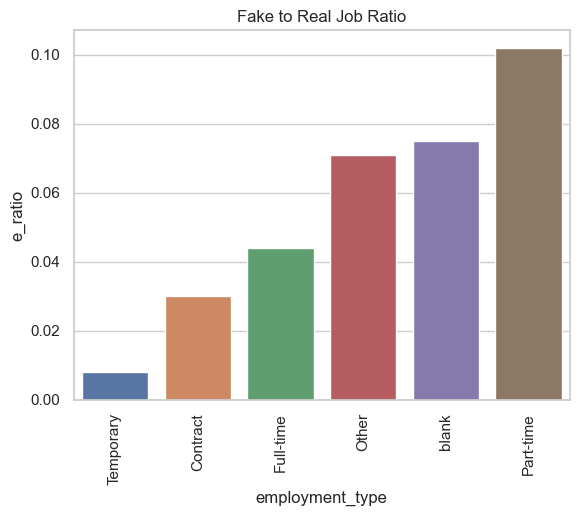

In [78]:
sns.barplot(data=emp_ratio.sort_values(by='e_ratio'), x='employment_type', y='e_ratio')
plt.xticks(rotation=90)
plt.title('Fake to Real Job Ratio')
plt.show()

# Required_experience

In [79]:
req_exp_ratio = round(fake_job_postings[fake_job_postings.fraudulent == 1].groupby('required_experience').required_experience.count()/fake_job_postings[fake_job_postings.fraudulent == 0].groupby('required_experience').required_experience.count(), 3)
req_exp_ratio = pd.DataFrame({'required_experience':req_exp_ratio.index, 'r_ratio':req_exp_ratio.values})

In [80]:
req_exp_ratio

required_experience  r_ratio
0           Associate    0.019
1            Director    0.046
2         Entry level    0.071
3           Executive    0.076
4          Internship    0.027
5    Mid-Senior level    0.031
6      Not Applicable    0.057
7               blank    0.066

In [81]:
fake_job_postings = fake_job_postings.merge(req_exp_ratio)

In [82]:
fake_job_postings.r_ratio.fillna(0, inplace=True)

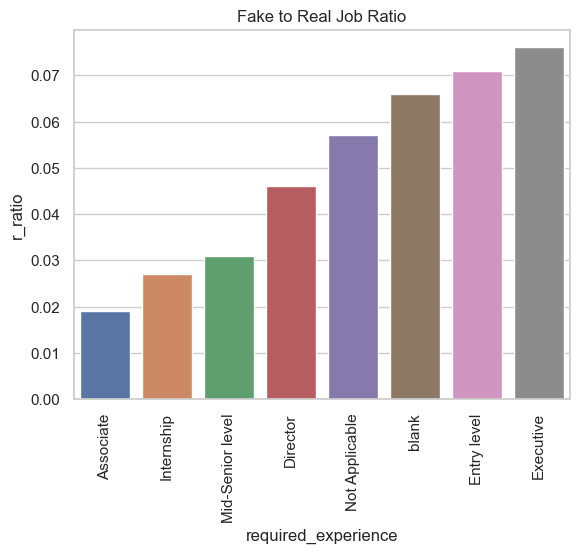

In [83]:
sns.barplot(data=req_exp_ratio.sort_values(by='r_ratio'), x='required_experience', y='r_ratio')
plt.xticks(rotation=90)
plt.title('Fake to Real Job Ratio')
plt.show()

# Required_education

In [84]:
req_edu_ratio = round(fake_job_postings[fake_job_postings.fraudulent == 1].groupby('required_education').required_education.count()/fake_job_postings[fake_job_postings.fraudulent == 0].groupby('required_education').required_education.count(), 3)
req_edu_ratio = pd.DataFrame({'required_education':req_edu_ratio.index, 'r_edu_ratio':req_edu_ratio.values})

In [85]:
fake_job_postings = fake_job_postings.merge(req_edu_ratio)

In [86]:
fake_job_postings.r_edu_ratio.fillna(0, inplace=True)

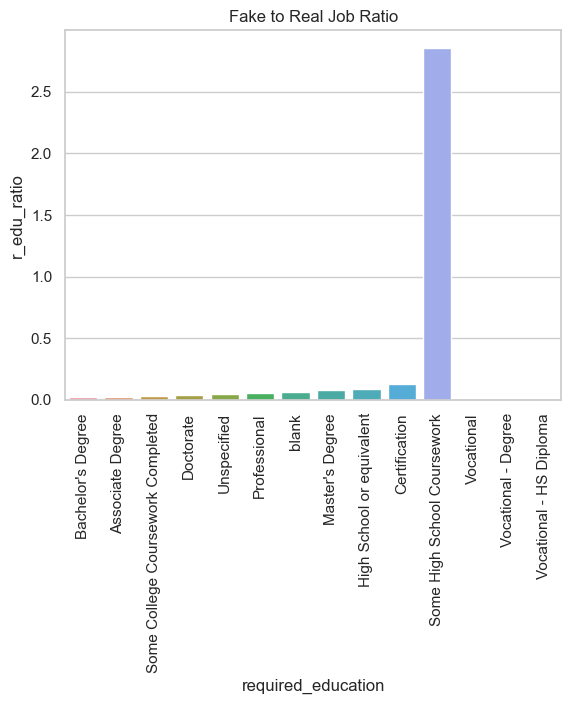

In [87]:
sns.barplot(data=req_edu_ratio.sort_values(by='r_edu_ratio'), x='required_education', y='r_edu_ratio')
plt.xticks(rotation=90)
plt.title('Fake to Real Job Ratio')
plt.show()

# Industry

In [88]:
industry_ratio = round(fake_job_postings[fake_job_postings.fraudulent == 1].groupby('industry').industry.count()/fake_job_postings[fake_job_postings.fraudulent == 0].groupby('industry').industry.count(), 3)
industry_ratio = pd.DataFrame({'industry':industry_ratio.index, 'i_ratio':industry_ratio.values})

In [89]:
industry_ratio

industry  i_ratio
0                        Accounting    0.559
1                 Airlines/Aviation    0.016
2    Alternative Dispute Resolution      NaN
3                         Animation    0.667
4                 Apparel & Fashion    0.021
..                              ...      ...
127                       Wholesale    0.100
128                Wine and Spirits      NaN
129                        Wireless      NaN
130             Writing and Editing      NaN
131                           blank    0.059

[132 rows x 2 columns]

In [90]:
fake_job_postings = fake_job_postings.merge(industry_ratio)

In [91]:
fake_job_postings.i_ratio.fillna(0, inplace=True)

In [92]:
industry_ratio_plot = industry_ratio[industry_ratio.i_ratio > 0.19]

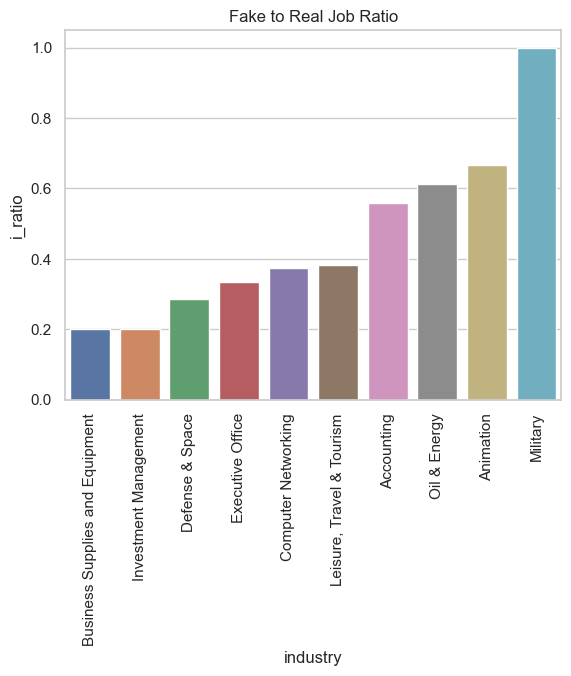

In [93]:
sns.barplot(data=industry_ratio_plot.sort_values(by='i_ratio'), x='industry', y='i_ratio')
plt.xticks(rotation=90)
plt.title('Fake to Real Job Ratio')
plt.show()

# Function

In [94]:
fun_ratio = round(fake_job_postings[fake_job_postings.fraudulent == 1].groupby('function').function.count()/fake_job_postings[fake_job_postings.fraudulent == 0].groupby('function').function.count(), 3)
fun_ratio = pd.DataFrame({'function':fun_ratio.index, 'f_ratio':fun_ratio.values})

In [95]:
fun_ratio.head(10)

function  f_ratio
0   Accounting/Auditing    0.158
1        Administrative    0.233
2           Advertising    0.059
3          Art/Creative    0.008
4      Business Analyst    0.012
5  Business Development    0.060
6            Consulting    0.029
7      Customer Service    0.058
8          Data Analyst    0.051
9                Design    0.009

In [96]:
fake_job_postings = fake_job_postings.merge(fun_ratio)

In [97]:
fake_job_postings.f_ratio.fillna(0, inplace=True)

In [98]:
function_ratio_plot = fun_ratio[fun_ratio.f_ratio > 0]

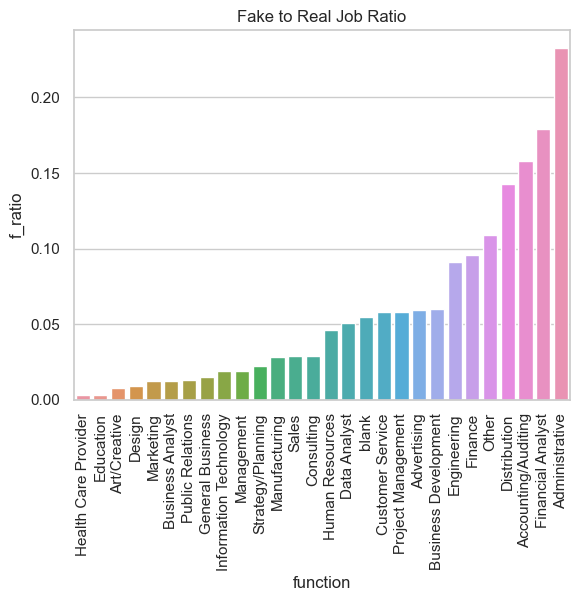

In [99]:
sns.barplot(data=function_ratio_plot.sort_values(by='f_ratio'), x='function', y='f_ratio')
plt.xticks(rotation=90)
plt.title('Fake to Real Job Ratio')
plt.show()

In [100]:
fake_job_postings.fillna(" ",inplace = True)

fake_job_postings['text'] =  fake_job_postings['title'] + ' ' + fake_job_postings['location']+ ' ' + fake_job_postings['department'] + ' ' + fake_job_postings['company_profile'] + ' ' + \
        fake_job_postings['description'] + ' ' + fake_job_postings['requirements'] + ' ' + fake_job_postings['benefits']


fake_job_postings.drop(['index','job_id', 'department', 'salary_range', 'title','location','department','company_profile','description','requirements','benefits','employment_type','required_experience','required_education','industry','function', 'city', 'state_city', 'state','country'], axis = 1, inplace = True)

In [101]:
fake_job_postings

telecommuting  has_company_logo  has_questions  fraudulent  ratio  \
0                  0                 1              0           0   0.03   
1                  0                 1              0           0   0.03   
2                  0                 1              1           0   0.00   
3                  0                 1              1           0   0.00   
4                  0                 1              0           0   0.03   
...              ...               ...            ...         ...    ...   
17875              0                 0              0           0   0.05   
17876              0                 0              0           0   0.00   
17877              0                 1              1           0   0.05   
17878              0                 0              0           0   0.00   
17879              0                 0              0           0   0.00   

       e_ratio  r_ratio  r_edu_ratio  i_ratio  f_ratio  \
0        0.071    0.027        0.059    0.059    0.012   
1        0.071    0.027        0.059    0.059    0.012   
2        0.075    0.027        0.059    0.059    0.012   
3        0.075    0.027        0.059    0.059    0.012   
4        0.044    0.027        0.059    0.059    0.012   
...        ...      ...          ...      ...      ...   
17875    0.044    0.031        0.020    0.114    0.000   
17876    0.044    0.057        0.046    0.134    0.000   
17877    0.044    0.046        0.020    0.019    0.000   
17878    0.044    0.066        0.059    0.000    0.000   
17879    0.044    0.019        0.022    0.121    0.000   

                                                    text  
0      Marketing Intern US, NY, New York Marketing We...  
1      Audience Development Intern US, NY, New York M...  
2      Marketing Trainee- Russian Market GR, I, Athen...  
3      OUD: Stage Marketing 3. NL, UT, Amersfoort   S...  
4      Marketing Intern US, NY, New York   Fusemachin...  
...                                                  ...  
17875  Materials Manager (Hospital Experience Require...  
17876  Executive Assistant - Purchasing Department US...  
17877  Purchasing Director US, ,    Human capital is ...  
17878  Purchasing Agent US, MN, Ramsey     Diamond Gr...  
17879  Purchasing Agent US, WI, Franksville Accountin...  

[17880 rows x 11 columns]

In [102]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from wordcloud import WordCloud,STOPWORDS
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from collections import defaultdict
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from nltk import ngrams
import seaborn as sns
import pandas as pd
import numpy as np
import os
import re

In [103]:
stop=set(stopwords.words("english"))

In [104]:
def clean(text):
    text=text.lower()
    obj=re.compile(r"<.*?>")                     #removing html tags
    text=obj.sub(r" ",text)
    obj=re.compile(r"https://\S+|http://\S+")    #removing url
    text=obj.sub(r" ",text)
    obj=re.compile(r"[^\w\s]")                   #removing punctuations
    text=obj.sub(r" ",text)
    obj=re.compile(r"\d{1,}")                    #removing digits
    text=obj.sub(r" ",text)
    obj=re.compile(r"_+")                        #removing underscore
    text=obj.sub(r" ",text)
    obj=re.compile(r"\s\w\s")                    #removing single character
    text=obj.sub(r" ",text)
    obj=re.compile(r"\s{2,}")                    #removing multiple spaces
    text=obj.sub(r" ",text)
   
    
    stemmer = SnowballStemmer("english")
    text=[stemmer.stem(word) for word in text.split() if word not in stop]
    
    return " ".join(text)

In [105]:
fake_job_postings["text"]= fake_job_postings["text"].apply(clean)

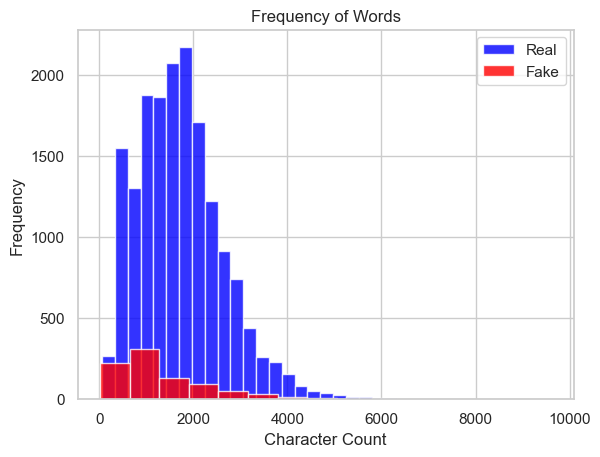

In [106]:
fake_job_postings['character_count'] = fake_job_postings.text.apply(len)

fake_job_postings[fake_job_postings.fraudulent==0].character_count.plot(bins=35, kind='hist', color='blue', 
                                       label='Real', alpha=0.8)
fake_job_postings[fake_job_postings.fraudulent==1].character_count.plot(kind='hist', color='red', 
                                       label='Fake', alpha=0.8)
plt.legend()
plt.title('Frequency of Words')
plt.xlabel("Character Count");

In [56]:
fake_job_postings

telecommuting  has_company_logo  has_questions  fraudulent  ratio  \
0                  0                 1              0           0   0.03   
1                  0                 1              0           0   0.03   
2                  0                 1              1           0   0.00   
3                  0                 1              1           0   0.00   
4                  0                 1              0           0   0.03   
...              ...               ...            ...         ...    ...   
17875              0                 0              0           0   0.05   
17876              0                 0              0           0   0.00   
17877              0                 1              1           0   0.05   
17878              0                 0              0           0   0.00   
17879              0                 0              0           0   0.00   

       e_ratio  r_ratio  r_edu_ratio  i_ratio  f_ratio  \
0        0.071    0.027        0.059    0.059    0.012   
1        0.071    0.027        0.059    0.059    0.012   
2        0.075    0.027        0.059    0.059    0.012   
3        0.075    0.027        0.059    0.059    0.012   
4        0.044    0.027        0.059    0.059    0.012   
...        ...      ...          ...      ...      ...   
17875    0.044    0.031        0.020    0.114    0.000   
17876    0.044    0.057        0.046    0.134    0.000   
17877    0.044    0.046        0.020    0.019    0.000   
17878    0.044    0.066        0.059    0.000    0.000   
17879    0.044    0.019        0.022    0.121    0.000   

                                                    text  character_count  
0      market intern us ny new york market food creat...             1727  
1      audienc develop intern us ny new york market f...             1736  
2      market traine russian market gr athen market u...             1050  
3      oud stage market nl ut amersfoort summaview ee...             1924  
4      market intern us ny new york fusemachin combin...             2129  
...                                                  ...              ...  
17875  materi manag hospit experi requir near casper ...              465  
17876  execut assist purchas depart us nj lakewood pu...              704  
17877  purchas director us human capit usual biggest ...             3414  
17878  purchas agent us mn ramsey diamond graphic inc...             3199  
17879  purchas agent us wi franksvill account financ ...             1579  

[17880 rows x 12 columns]

In [108]:
fake_job_postings.to_csv("D:\\data_sets\\fake_job_cleandata.csv")

In [109]:
def generate(text,ngram):
    n_grams=ngrams(word_tokenize(text),ngram)
    grams=[" ".join(val) for val in n_grams]
    return grams

(-0.5, 799.5, 799.5, -0.5)

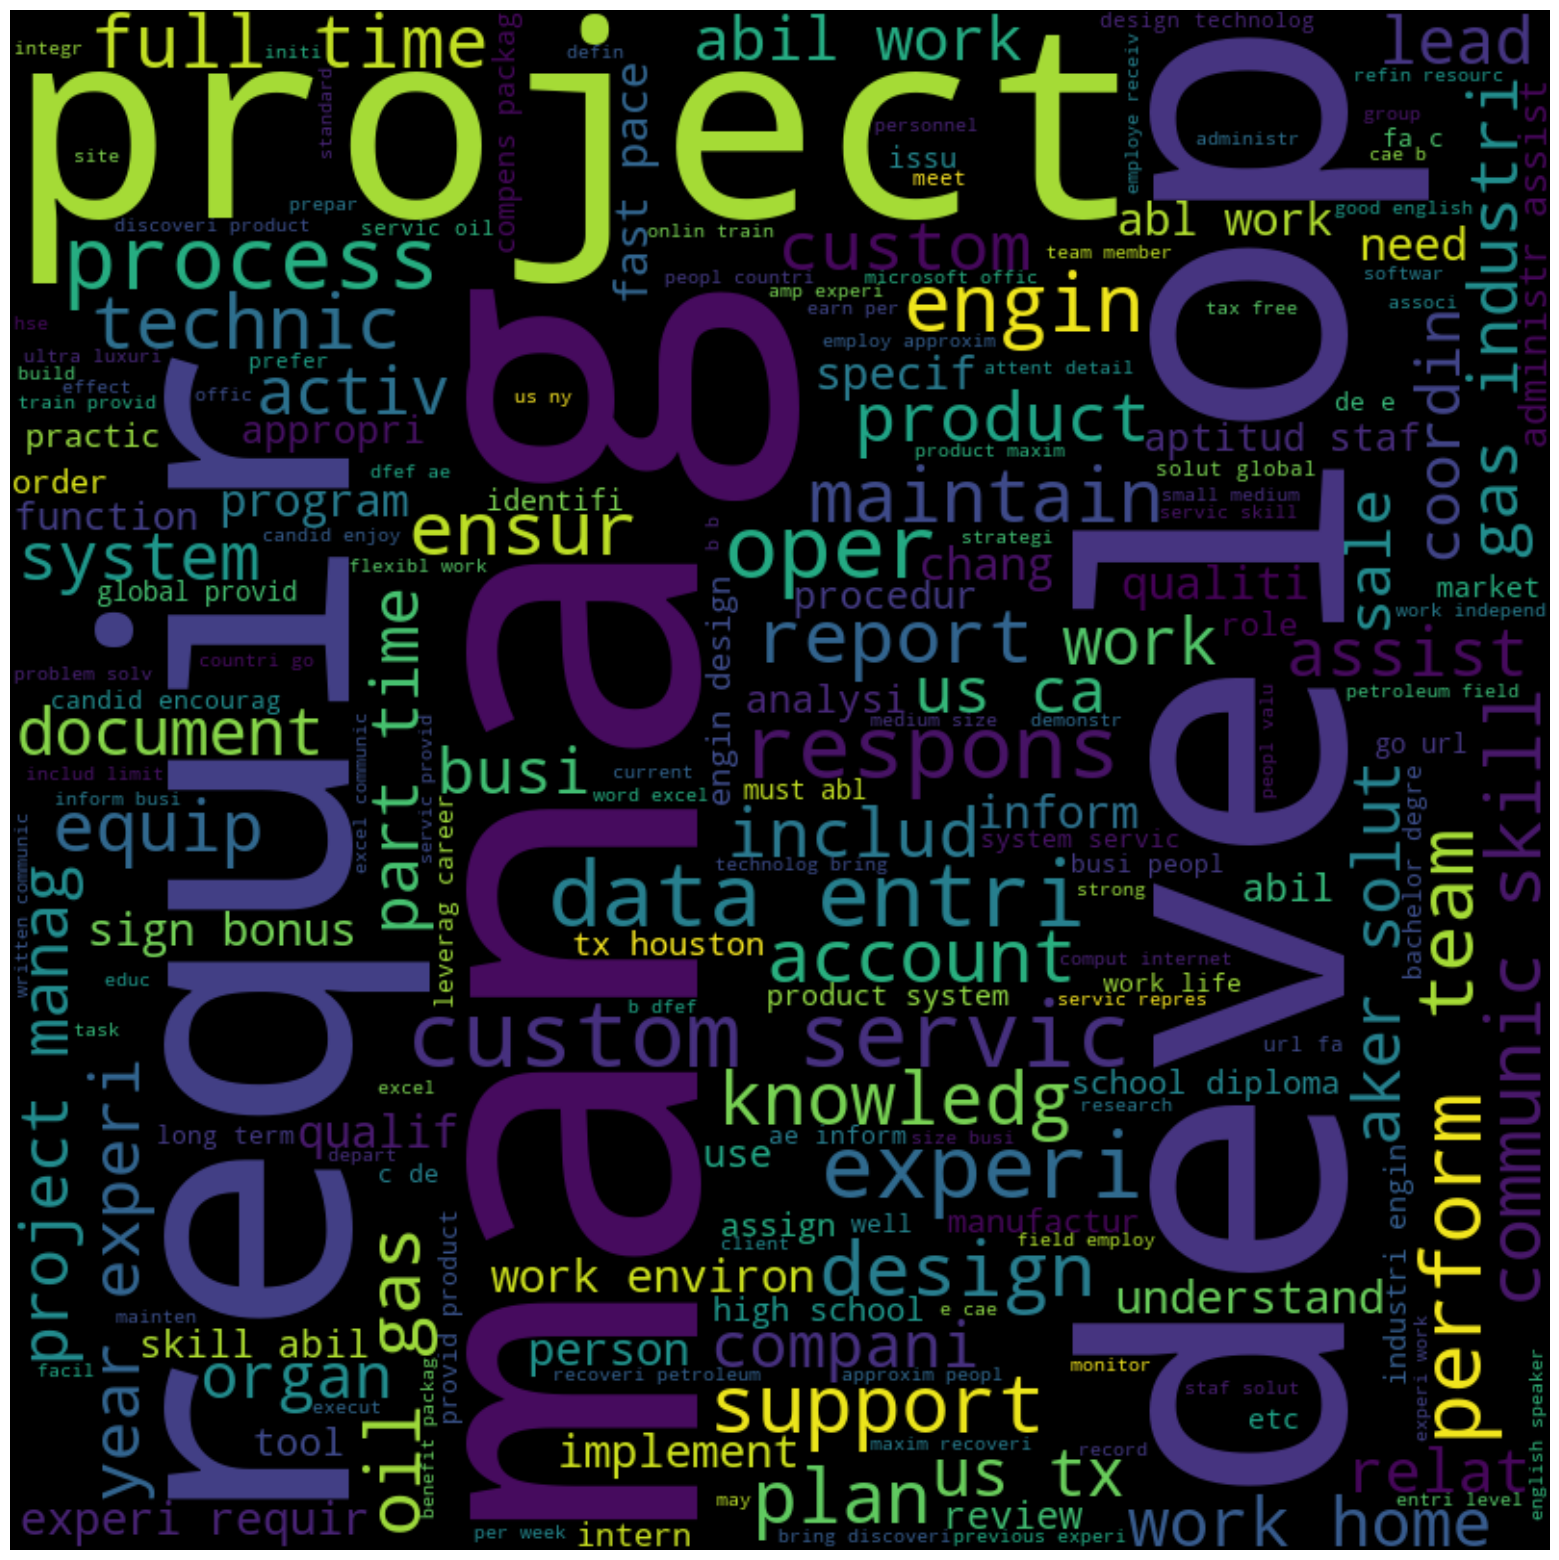

In [110]:
real_job=fake_job_postings[fake_job_postings["fraudulent"]==1]["text"].values
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                stopwords = STOPWORDS).generate(str(real_job))

fig = plt.figure(figsize = (30,20))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')

(-0.5, 799.5, 799.5, -0.5)

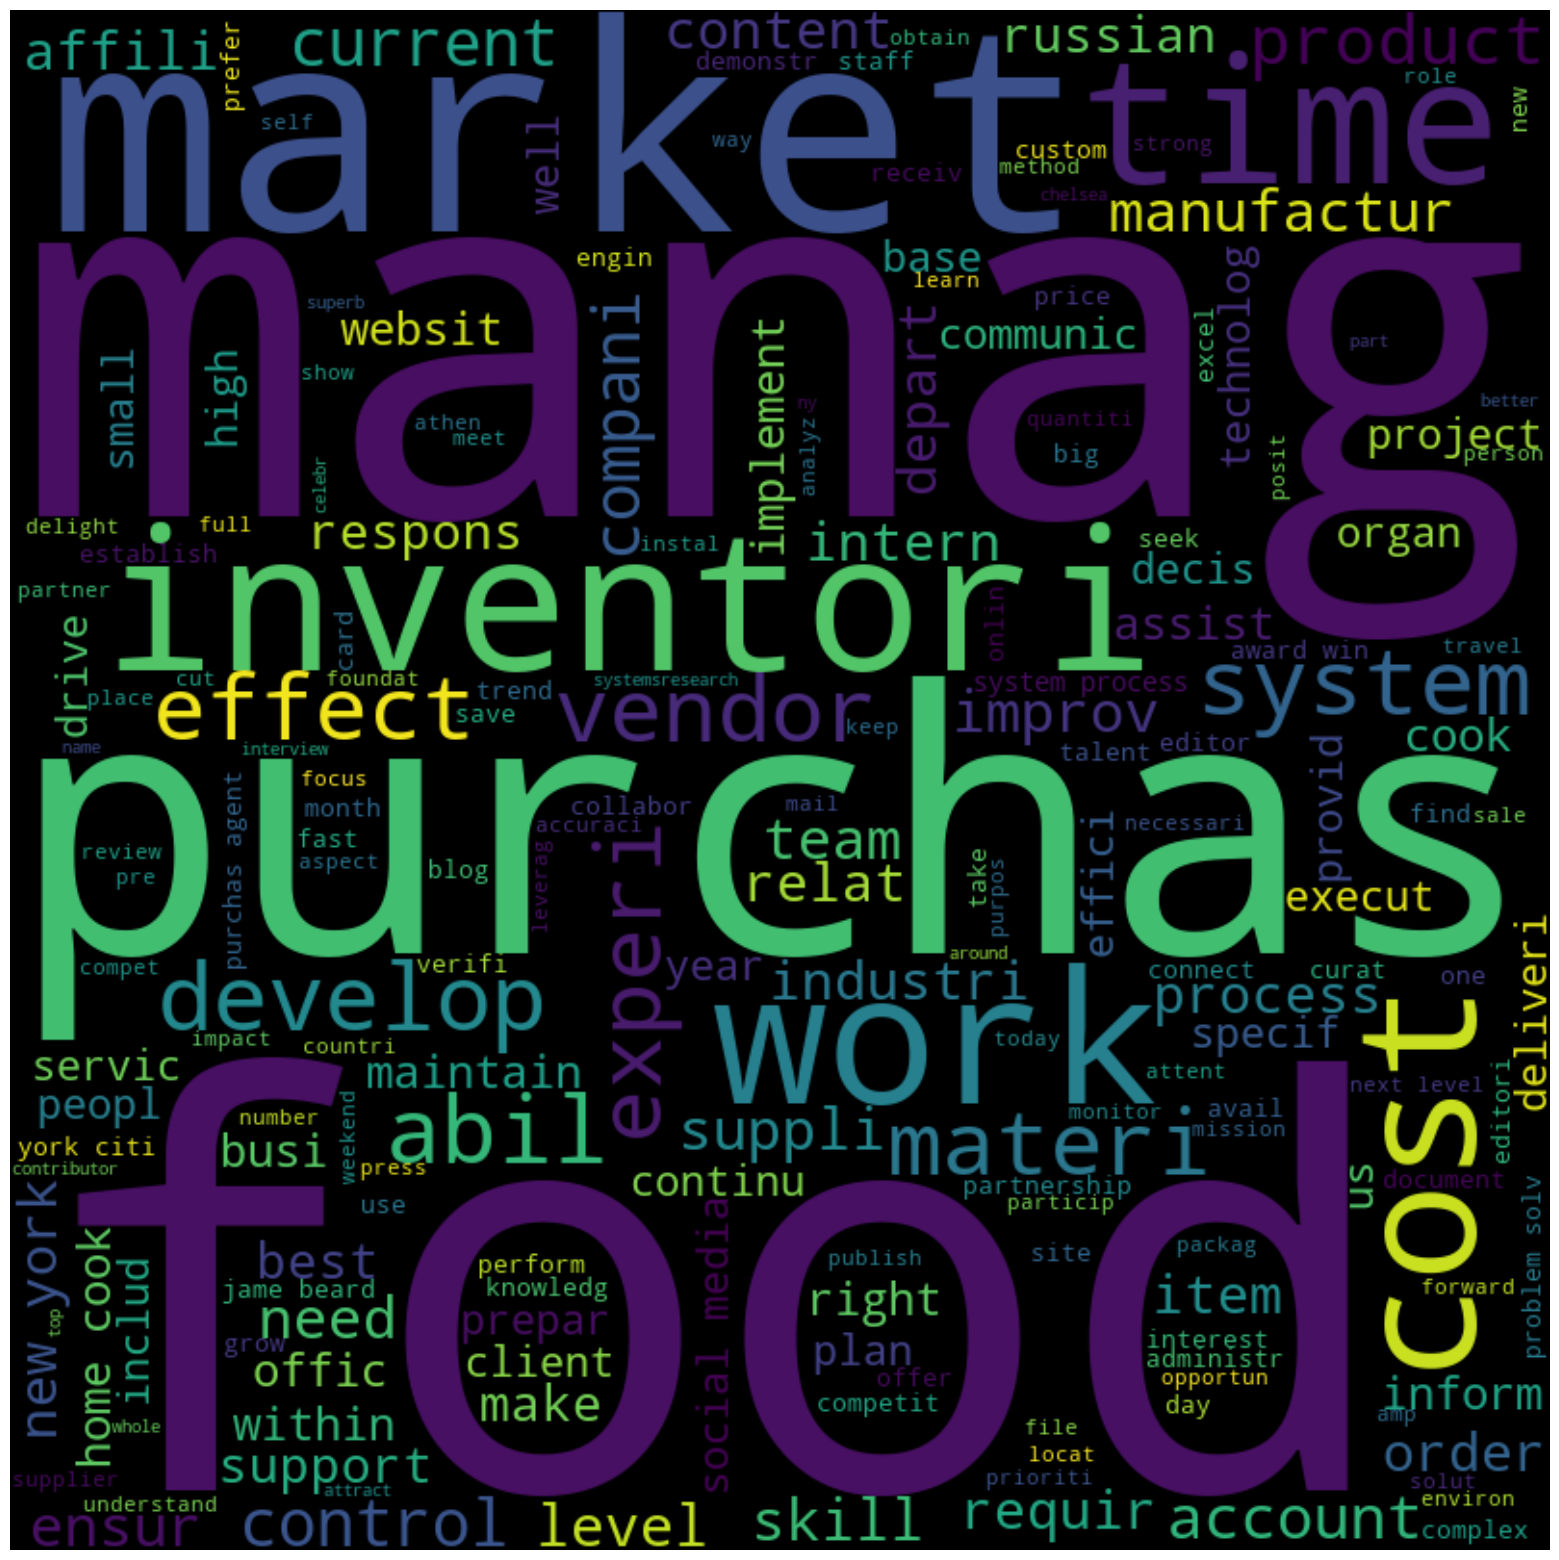

In [111]:
real_job=fake_job_postings[fake_job_postings["fraudulent"]==0]["text"].values
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                stopwords = STOPWORDS).generate(str(real_job))

fig = plt.figure(figsize = (30,20))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')

<BarContainer object of 10 artists>

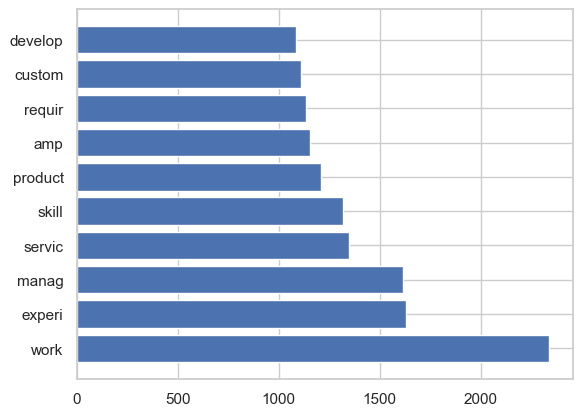

In [112]:
#number of reapetion
pos_1=defaultdict(int)

for text in fake_job_postings[fake_job_postings["fraudulent"]==1]["text"]:
    for words in generate(text,1):
        pos_1[words]+=1
        
pos=pd.DataFrame(sorted(pos_1.items(),key=lambda x: x[1],reverse=True))
plt.barh(pos[0][:10],pos[1][:10])

<BarContainer object of 10 artists>

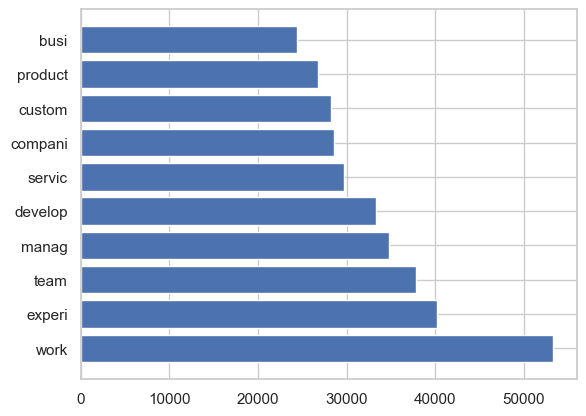

In [113]:
#number of reapetion
pos_1=defaultdict(int)

for text in fake_job_postings[fake_job_postings["fraudulent"]==0]["text"]:
    for words in generate(text,1):
        pos_1[words]+=1
        
pos=pd.DataFrame(sorted(pos_1.items(),key=lambda x: x[1],reverse=True))
plt.barh(pos[0][:10],pos[1][:10])

In [133]:
fake_job_postings = pd.read_csv("D:\\data_sets\\fake_job_cleandata.csv")
fake_job_postings

Unnamed: 0  telecommuting  has_company_logo  has_questions  fraudulent  \
0               0              0                 1              0           0   
1               1              0                 1              0           0   
2               2              0                 1              1           0   
3               3              0                 1              1           0   
4               4              0                 1              0           0   
...           ...            ...               ...            ...         ...   
17875       17875              0                 0              0           0   
17876       17876              0                 0              0           0   
17877       17877              0                 1              1           0   
17878       17878              0                 0              0           0   
17879       17879              0                 0              0           0   

       ratio  e_ratio  r_ratio  r_edu_ratio  i_ratio  f_ratio  \
0       0.03    0.071    0.027        0.059    0.059    0.012   
1       0.03    0.071    0.027        0.059    0.059    0.012   
2       0.00    0.075    0.027        0.059    0.059    0.012   
3       0.00    0.075    0.027        0.059    0.059    0.012   
4       0.03    0.044    0.027        0.059    0.059    0.012   
...      ...      ...      ...          ...      ...      ...   
17875   0.05    0.044    0.031        0.020    0.114    0.000   
17876   0.00    0.044    0.057        0.046    0.134    0.000   
17877   0.05    0.044    0.046        0.020    0.019    0.000   
17878   0.00    0.044    0.066        0.059    0.000    0.000   
17879   0.00    0.044    0.019        0.022    0.121    0.000   

                                                    text  character_count  
0      market intern us ny new york market food creat...             1727  
1      audienc develop intern us ny new york market f...             1736  
2      market traine russian market gr athen market u...             1050  
3      oud stage market nl ut amersfoort summaview ee...             1924  
4      market intern us ny new york fusemachin combin...             2129  
...                                                  ...              ...  
17875  materi manag hospit experi requir near casper ...              465  
17876  execut assist purchas depart us nj lakewood pu...              704  
17877  purchas director us human capit usual biggest ...             3414  
17878  purchas agent us mn ramsey diamond graphic inc...             3199  
17879  purchas agent us wi franksvill account financ ...             1579  

[17880 rows x 13 columns]

In [134]:
X = fake_job_postings[['telecommuting','has_company_logo','has_questions', 'ratio','e_ratio','r_ratio','r_edu_ratio','i_ratio','f_ratio','text', 'character_count']]
y = fake_job_postings['fraudulent']

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state = 52)

In [136]:
X_train_num = X_train[['telecommuting','has_company_logo','has_questions', 'ratio','e_ratio','r_ratio','r_edu_ratio','i_ratio','f_ratio', 'character_count']]
X_test_num = X_test[['telecommuting','has_company_logo','has_questions', 'ratio','e_ratio','r_ratio','r_edu_ratio','i_ratio','f_ratio', 'character_count']]

In [137]:
import warnings
warnings.filterwarnings("ignore")
    
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import numpy as np

# Multinomial Naïve Bayes

In [138]:
count_vectorizer = CountVectorizer(stop_words='english')
count_train = count_vectorizer.fit_transform(X_train.text.values)
count_test = count_vectorizer.transform(X_test.text.values)

In [139]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import train_test_split

nb_classifier = MultinomialNB()
nb_classifier.fit(count_train, y_train)
pred = nb_classifier.predict(count_test)
metrics.accuracy_score(y_test, pred)

0.9716629381058911

# ROC Curve

In [140]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score

In [141]:
report = classification_report(y_test,pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      5102
           1       0.88      0.48      0.63       262

    accuracy                           0.97      5364
   macro avg       0.93      0.74      0.81      5364
weighted avg       0.97      0.97      0.97      5364



In [142]:
fpr, tpr, thresholds = roc_curve(y_test, pred)
auc = roc_auc_score(y_test, pred)

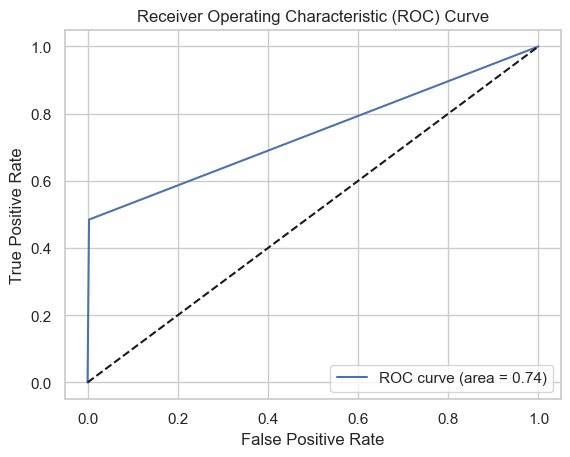

In [143]:
# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')  # Plot the diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Confusion Matrix

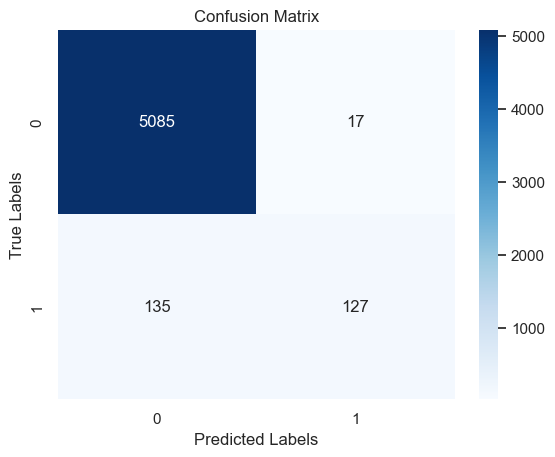

In [144]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred)

# Display the confusion matrix using a heatmap
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# XGBoost Classifier

In [150]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# Create an empty list to store the models
models = []

# Add XGBoost to the list
models.append(('XGBoost', XGBClassifier()))

# Iterate over the models list and train/evaluate each model
for name, model in models:
    # Train the model
    model.fit(count_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(count_test)
    
    # Compute and display evaluation metrics (e.g., accuracy, precision, recall)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1_score = metrics.f1_score(y_test, pred)
    cm = confusion_matrix(y_test, pred)
    
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1_score}")
    print(f"Confusion Matrix:\n {cm}")
    #print(classification_report(y_test,y_pred))
    print()

Model: XGBoost
Accuracy: 0.9850857568978374
Precision: 0.941747572815534
Recall: 0.7404580152671756
F1 Score: 0.625615763546798
Confusion Matrix:
 [[5085   17]
 [ 135  127]]



# Logistic Regression

In [147]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# Create an empty list to store the models
models = []

# Add Logistic Regression to the list
models.append(('Logistic Regression', LogisticRegression()))

# Iterate over the models list and train/evaluate each model
for name, model in models:
    # Train the model
    model.fit(count_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(count_test)
    
    # Compute and display evaluation metrics (e.g., accuracy, precision, recall)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1_score = metrics.f1_score(y_test, pred)
    cm = confusion_matrix(y_test, pred)
    
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1_score}")
    print(f"Confusion Matrix:\n {cm}")
    #print(classification_report(y_test,y_pred))
    print()

Model: Logistic Regression
Accuracy: 0.9848993288590604
Precision: 0.91324200913242
Recall: 0.7633587786259542
F1 Score: 0.625615763546798
Confusion Matrix:
 [[5085   17]
 [ 135  127]]



 # Random Forest Classifier

In [148]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# Create an empty list to store the models
models = []

# Add Random Forest Classifier to the list
models.append(('Random Forest Classifier', RandomForestClassifier()))

# Iterate over the models list and train/evaluate each model
for name, model in models:
    # Train the model
    model.fit(count_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(count_test)
    
    # Compute and display evaluation metrics (e.g., accuracy, precision, recall)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1_score = metrics.f1_score(y_test, pred)
    cm = confusion_matrix(y_test, pred)
    
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1_score}")
    print(f"Confusion Matrix:\n {cm}")
    #print(classification_report(y_test,y_pred))
    print()

Model: Random Forest Classifier
Accuracy: 0.9806114839671887
Precision: 0.99375
Recall: 0.6068702290076335
F1 Score: 0.625615763546798
Confusion Matrix:
 [[5085   17]
 [ 135  127]]



# SGD Classifier

In [149]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# Create an empty list to store the models
models = []

# Add SGD Classifier to the list
models.append(('Stochastic Gradient Descent', SGDClassifier()))

# Iterate over the models list and train/evaluate each model
for name, model in models:
    # Train the model
    model.fit(count_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(count_test)
    
    # Compute and display evaluation metrics (e.g., accuracy, precision, recall)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1_score = metrics.f1_score(y_test, pred)
    cm = confusion_matrix(y_test, pred)
    
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1_score}")
    print(f"Confusion Matrix:\n {cm}")
    #print(classification_report(y_test,y_pred))
    print()

Model: Stochastic Gradient Descent
Accuracy: 0.9809843400447428
Precision: 0.8418803418803419
Recall: 0.7519083969465649
F1 Score: 0.625615763546798
Confusion Matrix:
 [[5085   17]
 [ 135  127]]

